#Convexity

# CONVEX RELAXATION OF THE EMPIRICAL RISK MINIMIZATION AND CONVEX RELAXATION


In [ ]:
import numpy as np
from scipy.optimize import minimize

def empirical_risk(theta, X, y, loss_func):
    """
    Compute the empirical risk given model parameters `theta`,
    dataset `X` (features), `y` (labels), and a loss function `loss_func`.
    """
    n = len(y)
    total_loss = 0.0
    for i in range(n):
        total_loss += loss_func(theta, X[i], y[i])
    return total_loss / n

def convex_relaxation(X, y, loss_func, initial_theta=None):
    """
    Perform convex relaxation of empirical risk minimization (ERM)
    given dataset `X` (features), `y` (labels), and a convex `loss_func`.
    """
    n, d = X.shape  # n: number of samples, d: number of features

    def objective(theta):
        return empirical_risk(theta, X, y, loss_func)

    if initial_theta is None:
        initial_theta = np.zeros(d)  # Initialize with zeros

    # Minimize the empirical risk using a convex optimization solver
    result = minimize(objective, initial_theta, method='BFGS')
    optimal_theta = result.x
    min_empirical_risk = result.fun

    return optimal_theta, min_empirical_risk

# Example usage:
# Define a convex loss function (e.g., squared loss)
def squared_loss(theta, x, y):
    return (np.dot(x, theta) - y) ** 2

# Generate synthetic dataset
np.random.seed(0)
n_samples = 100
n_features = 3
X = np.random.randn(n_samples, n_features)
true_theta = np.random.randn(n_features)
y = X.dot(true_theta) + np.random.randn(n_samples)

# Perform convex relaxation of ERM with squared loss
optimal_theta, min_empirical_risk = convex_relaxation(X, y, squared_loss)

print("Optimal Theta:", optimal_theta)
print("Minimum Empirical Risk:", min_empirical_risk)

Optimal Theta: [-1.23718602  1.54484303 -0.14034607]
Minimum Empirical Risk: 0.8610048057124469


#ϕ-risk minimization

In [ ]:
import numpy as np
from scipy.optimize import minimize

def phi_loss(theta, X, y, phi_func):
    """
    Compute the empirical risk with a given convex loss function `phi_func`.
    """
    n = len(y)
    total_loss = 0.0
    for i in range(n):
        total_loss += phi_func(np.dot(X[i], theta) - y[i])
    return total_loss / n

def zhang_lemma(phi_func, eps):
    """
    Implement Zhang's Lemma to construct a surrogate loss function.
    """
    def surrogate_loss(u):
        return phi_func(u) + eps * np.abs(u)
    return surrogate_loss

def phi_risk_minimization(X, y, phi_func, eps=0.1, initial_theta=None):
    """
    Perform phi-risk minimization using Zhang's Lemma.

    Args:
    - X: Input features (n_samples x n_features)
    - y: Target labels (n_samples,)
    - phi_func: Convex loss function phi(u)
    - eps: Regularization parameter for Zhang's Lemma
    - initial_theta: Initial guess for model parameters

    Returns:
    - optimal_theta: Optimal model parameters minimizing the surrogate risk
    """
    n_samples, n_features = X.shape

    # Define the surrogate loss function using Zhang's Lemma
    surrogate_loss = zhang_lemma(phi_func, eps)

    def objective(theta):
        return phi_loss(theta, X, y, surrogate_loss)

    if initial_theta is None:
        initial_theta = np.zeros(n_features)

    # Minimize the surrogate risk using a convex optimization solver
    result = minimize(objective, initial_theta, method='BFGS')
    optimal_theta = result.x

    return optimal_theta

# Example usage:
# Define a convex loss function (e.g., squared loss)
def squared_loss(u):
    return 0.5 * u**2

# Generate synthetic dataset
np.random.seed(0)
n_samples = 100
n_features = 3
X = np.random.randn(n_samples, n_features)
true_theta = np.random.randn(n_features)
y = X.dot(true_theta) + np.random.randn(n_samples)

# Perform phi-risk minimization using Zhang's Lemma with squared loss
optimal_theta = phi_risk_minimization(X, y, squared_loss)

print("Optimal Theta:", optimal_theta)

Optimal Theta: [-1.23827974  1.54799278 -0.13768954]


#The computational complexity of machine learning.

In [ ]:
import numpy as np

def sample_complexity_bound(vc_dimension, confidence, error_tolerance):
    """
    Calculate the sample complexity bound using VC dimension, confidence level,
    and error tolerance.

    Args:
    - vc_dimension: VC dimension of the hypothesis class
    - confidence: Desired confidence level (e.g., 1 - delta)
    - error_tolerance: Desired error tolerance (e.g., epsilon)

    Returns:
    - sample_complexity: Estimated sample complexity bound
    """
    # Calculate sample complexity using VC dimension formula
    sample_complexity = (vc_dimension / error_tolerance) * np.log(1 / confidence)
    return sample_complexity

# Example usage:
vc_dim = 10  # VC dimension of the hypothesis class
confidence_level = 0.95  # Desired confidence level (1 - delta)
error_tolerance = 0.1  # Desired error tolerance (epsilon)

sample_complexity = sample_complexity_bound(vc_dim, confidence_level, error_tolerance)
print("Estimated Sample Complexity Bound:", sample_complexity)

Estimated Sample Complexity Bound: 5.1293294387550485


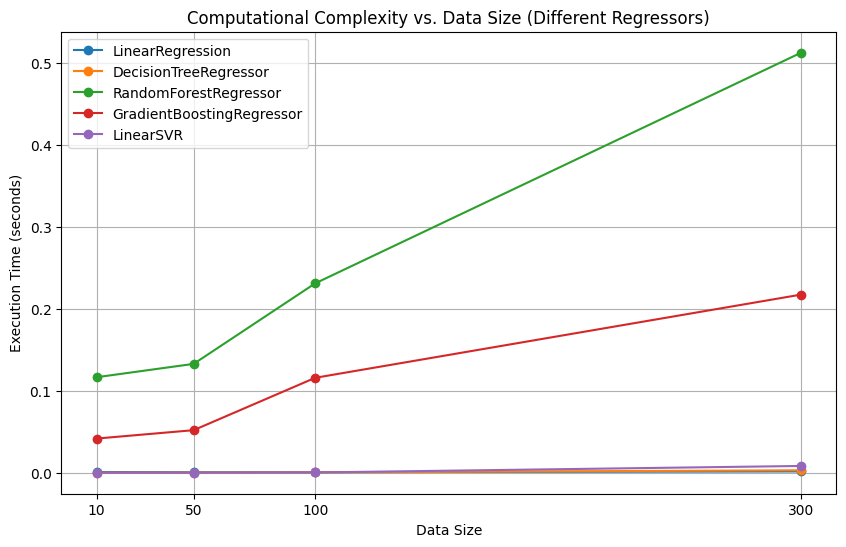

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
import time

# Step 1: Load and Preprocess the Diabetes Dataset
data = load_diabetes()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Implement Multiple Regression Models
def run_regression_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    execution_time = time.time() - start_time

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse, execution_time

# Define a list of regression models to evaluate
regressor_models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    LinearSVR()  # Use LinearSVR instead of SVR with RBF kernel
]

# Step 3: Measure Computational Complexity Across Different Data Sizes
data_sizes = [10, 50, 100, 300]  # Varying data sizes
model_names = [type(model).__name__ for model in regressor_models]
execution_times = {model_name: [] for model_name in model_names}

for size in data_sizes:
    # Calculate the proportion of data to use for training
    train_size = min(size, len(X_train)) / len(X_train)
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)

    for model in regressor_models:
        mse, execution_time = run_regression_model(model, X_train_subset, y_train_subset, X_test, y_test)
        execution_times[type(model).__name__].append(execution_time)

# Step 4: Plot the Computational Complexity
plt.figure(figsize=(10, 6))
for model_name in model_names:
    plt.plot(data_sizes, execution_times[model_name], marker='o', label=model_name)

plt.title('Computational Complexity vs. Data Size (Different Regressors)')
plt.xlabel('Data Size')
plt.ylabel('Execution Time (seconds)')
plt.xticks(data_sizes, data_sizes)
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

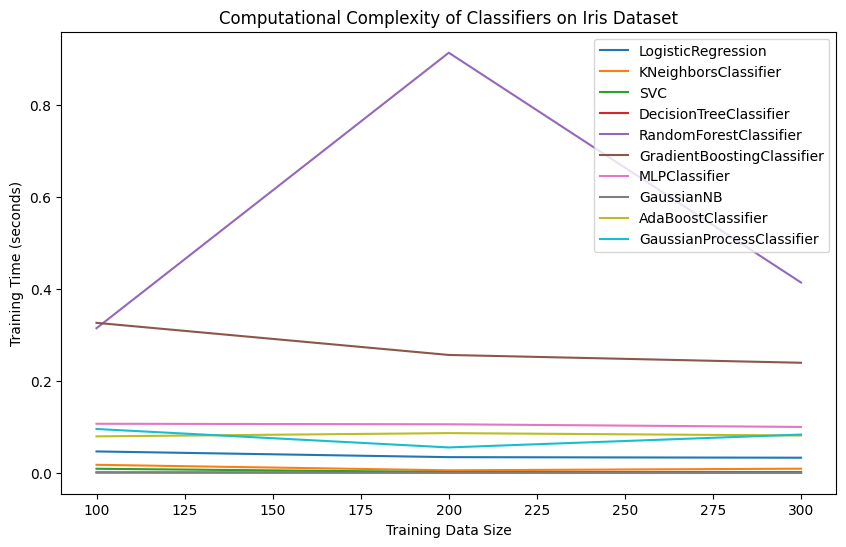

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from time import time

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Shuffle and split the dataset into training and testing sets
X, y = shuffle(X, y, random_state=42)

# Define a function to evaluate a classifier on varying data sizes
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    train_sizes = [100, 200, 300]  # Varying training set sizes
    times = []

    for size in train_sizes:
        start = time()
        clf.fit(X_train[:size], y_train[:size])
        y_pred = clf.predict(X_test)
        end = time()
        times.append(end - start)

    return times
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    GaussianProcessClassifier()
]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate each classifier
complexities = []

for clf in classifiers:
    times = evaluate_classifier(clf, X_train, y_train, X_test, y_test)
    complexities.append(times)
# Plotting the computational complexity
plt.figure(figsize=(10, 6))
for i, clf in enumerate(classifiers):
    plt.plot([100, 200, 300], complexities[i], label=type(clf).__name__)

plt.title("Computational Complexity of Classifiers on Iris Dataset")
plt.xlabel("Training Data Size")
plt.ylabel("Training Time (seconds)")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

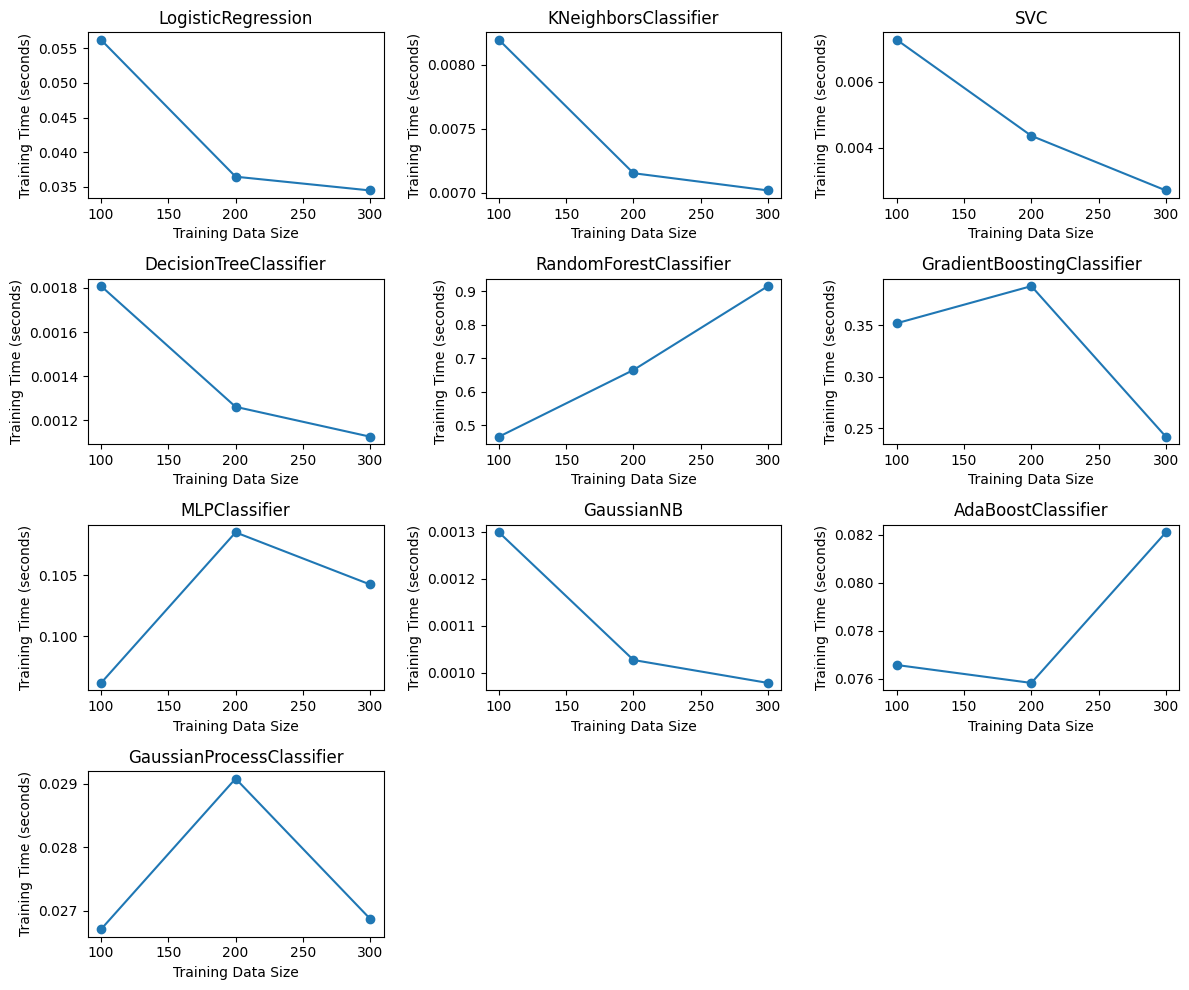

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from time import time

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X, y = shuffle(X, y, random_state=42)

# Define a function to evaluate a classifier on varying data sizes
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    train_sizes = [100, 200, 300]  # Varying training set sizes
    times = []

    for size in train_sizes:
        start = time()
        clf.fit(X_train[:size], y_train[:size])
        y_pred = clf.predict(X_test)
        end = time()
        times.append(end - start)

    return times

# Define classifiers
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    GaussianProcessClassifier()
]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate each classifier and plot the computational complexity
plt.figure(figsize=(12, 10))

for i, clf in enumerate(classifiers):
    plt.subplot(4, 3, i + 1)
    times = evaluate_classifier(clf, X_train, y_train, X_test, y_test)
    plt.plot([100, 200, 300], times, marker='o')
    plt.title(type(clf).__name__)
    plt.xlabel("Training Data Size")
    plt.ylabel("Training Time (seconds)")

plt.tight_layout()
plt.show()